In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import io

In [4]:
file_path = "./data/IMAGES_RAW.mat"
matdata = io.loadmat(file_path)

images = matdata['IMAGESr'].astype(np.float32)
# Change image order
images = np.array([images[:,:,i] for i in range(images.shape[2])])
# (10, 512, 512)

In [5]:
import cv2

def apply_DoG_filter(gray, ksize=(5,5), sigma1=1.3, sigma2=2.6):
    g1 = cv2.GaussianBlur(gray, ksize, sigma1)
    g2 = cv2.GaussianBlur(gray, ksize, sigma2)
    return g1 - g2

filtered_images = []

for i in range(10):
    filtered_image = apply_DoG_filter(images[i,:,:], (5,5), 1.3, 2.6)
    filtered_images.append(filtered_image)

## Patchを集める

In [6]:
w = images.shape[2]
h = images.shape[1]

size_w = w // 26
size_h = h // 16

patches = np.empty((size_h * size_w * len(images), 16, 26), dtype=np.float32)
for filtered_image in filtered_images:
    for j in range(size_h):
        y = 16 * j
        for i in range(size_w):
            x = 26 * i
            patch = filtered_image[y:y+16, x:x+26]
            # (16, 26)
            patches[j*size_w + i] = patch

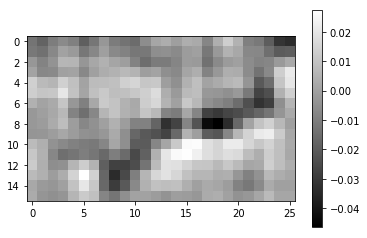

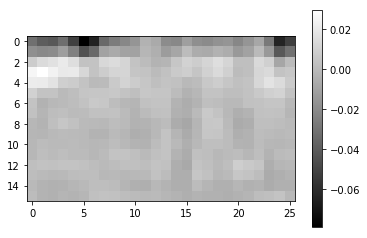

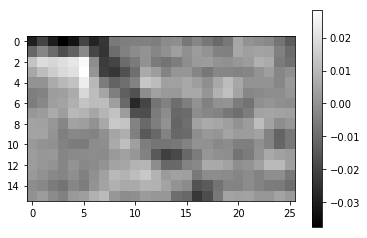

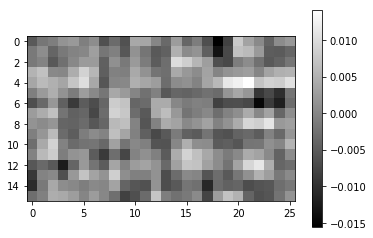

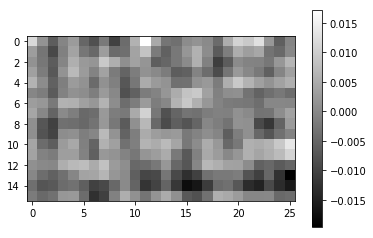

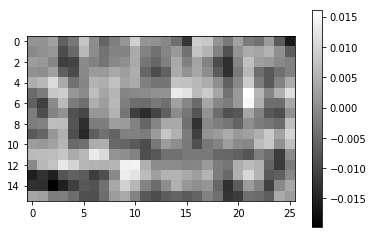

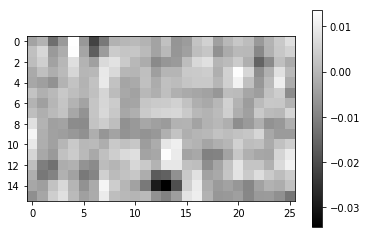

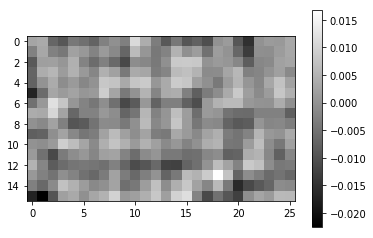

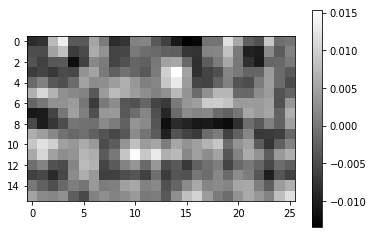

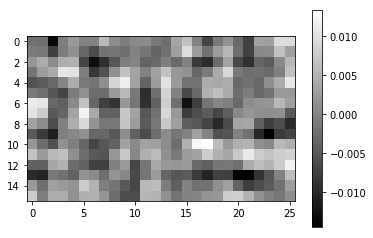

In [5]:
for i in range(10):
    plt.figure()
    plt.imshow(patches[i], cmap='gray')
    plt.colorbar()
    plt.show()

In [6]:
patches.shape

(6080, 16, 26)

In [8]:
from dataset import Dataset
dataset = Dataset()
dataset.patches.shape

(6080, 16, 26)

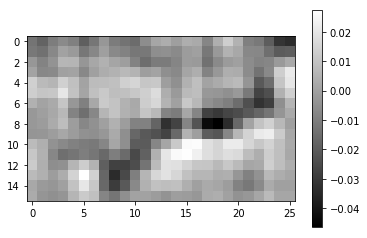

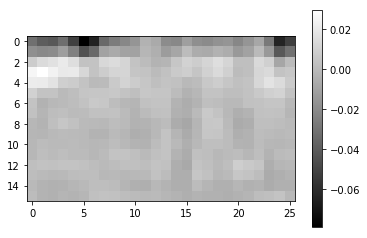

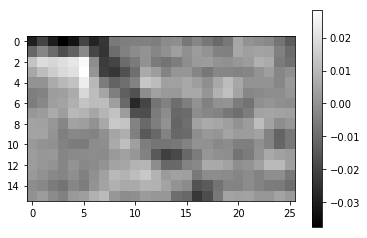

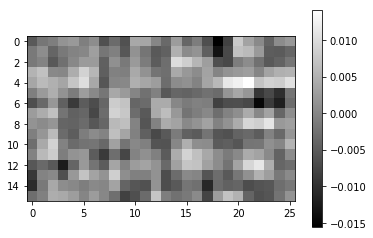

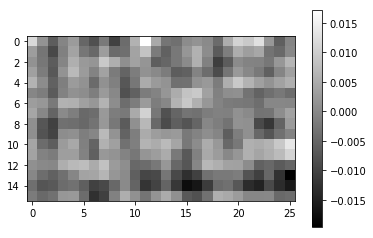

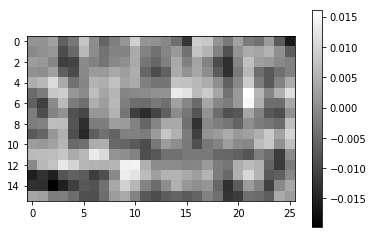

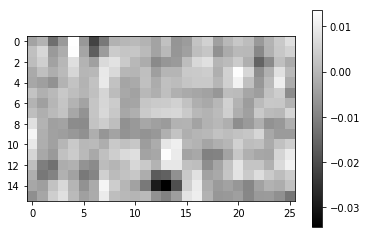

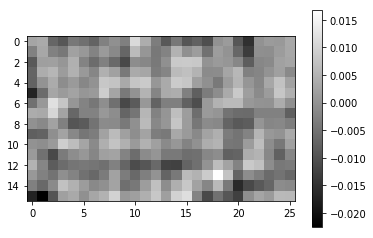

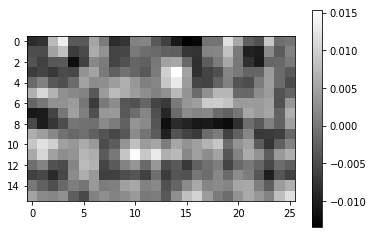

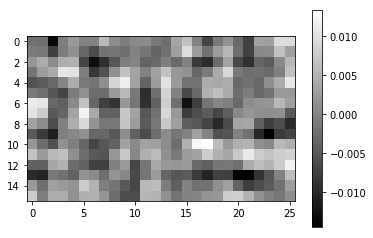

In [9]:

for i in range(10):
    plt.figure()
    plt.imshow(dataset.patches[i], cmap='gray')
    plt.colorbar()
    plt.show()